Predicción para una longitud de pétalo de 5 cm:
Es Virginica: True
Probabilidad de ser Virginica: 0.609475588891761


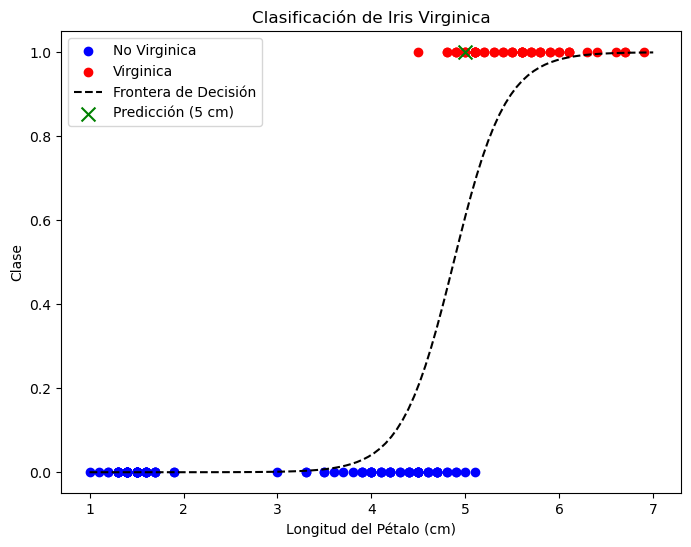

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, 2:3]  # Solo tomamos la longitud del pétalo (columna 2)
y = (iris.target == 2).astype(int)  # 1 si es Virginica, 0 si no lo es

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Representar los datos y el modelo
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0], y[y == 0], color='b', label='No Virginica')
plt.scatter(X[y == 1], y[y == 1], color='r', label='Virginica')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Clase')
plt.title('Clasificación de Iris Virginica')
plt.legend()

# Representar la frontera de decisión
x_values = np.linspace(1, 7, 100)
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]
plt.plot(x_values, y_values, color='black', linestyle='--', label='Frontera de Decisión')
plt.legend()

# Predecir la clase para una longitud de pétalo de 5 cm
predicted_class = model.predict([[5]])[0]
probability_virginica = model.predict_proba([[5]])[0][1]
print("Predicción para una longitud de pétalo de 5 cm:")
print("Es Virginica:", bool(predicted_class))
print("Probabilidad de ser Virginica:", probability_virginica)

# Marcar la predicción en el gráfico
plt.scatter([5], [predicted_class], color='g', marker='x', s=100, label='Predicción (5 cm)')
plt.legend()

plt.show()
